<a href="https://colab.research.google.com/github/gverebl6/InvestmentPortfolioML/blob/master/ConsultAPIandLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Test 1:
###Aplicación de Extracción de Informacion del API de Google junto con la aplicacion de la creación de un modelo de ML de regresion Lineal para el calculo de presion de las acciones en un instante de tiempo siguiente. 

#####Disclaimer: La aplicacion del algoritmo de regresion lineal no necesariamente sea lo adecuado para la prediccion de los precios de acciones a futuro. Se usa en este caso solo como ejemplo inicial. Mas adelante se buscara presentar la implementacion correcta para este problema. 



---



## Descargar librerias

##Importar Librerias

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import requests
from matplotlib import rcParams

##Inicializacion de la data global


In [0]:
RAPID_KEY = '3381c28cc2mshabe64e59906964dp16b7c7jsn200269cdcffd'
RAPID_HOST = 'apidojo-yahoo-finance-v1.p.rapidapi.com'

symbol_string = ''
inputdata = {}

##Obtener Data del API

In [0]:
def fetchStockData(symbol):
  url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-charts"
  querystring = {
      "comparisons":"%5EGDAXI%2C%5EFCHI",
      "region":"US",
      "lang":"en",
      "symbol":symbol,
      "interval":"1d",
      "range":"3mo"
      }
  headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "3381c28cc2mshabe64e59906964dp16b7c7jsn200269cdcffd"
    }
  response = requests.request("GET", url, headers=headers, params=querystring)

  if response.status_code == 200:
    return response.json()
  else: 
    return None
# testdata = fetchStockData('AAPL')
# print(testdata)  

In [122]:
print(type(inputdata))

<class 'dict'>


##Extraer la data 



In [0]:
#Parse and get timestamp
def parseTimestamp(inputdata):
  timestamplist = []
  
  timestamplist.extend(inputdata['chart']['result'][0]['timestamp'])
  timestamplist.extend(inputdata['chart']['result'][0]['timestamp'])
  #Se corre dos veces, una para open y otra para closing

  calendartime = []

  for ts in timestamplist:
    dt = datetime.fromtimestamp(ts)
    calendartime.append(dt.strftime("%m/%d/%Y"))
  return calendartime

#FOR TEST
#print(parseTimestamp(testdata))

In [0]:
#Extract opening and closing.
def parseValues(inputdata):
  valueList = []
  
  valueList.extend(inputdata['chart']['result'][0]['indicators']['quote'][0]['open'])
  valueList.extend(inputdata['chart']['result'][0]['indicators']['quote'][0]['close'])

  return valueList

#FOR TEST
#print(parseValues(inputdata))

In [0]:
#Get the open and close events
def attachEvent(inputdata):
  eventlist = []

  for i in range(0, len(inputdata['chart']['result'][0]['timestamp'])):
    eventlist.append('open')

  for i in range(0, len(inputdata['chart']['result'][0]['timestamp'])):
    eventlist.append('close')

  return eventlist

#FOR TEST
#print(attachEvent(inputdata))

##Extraccion de Data en un DataFrame de Pandas

In [0]:
#Verificacion de la entrada del usuario. 

def main():
  symbol_string = ''
  try: 
    while (len(symbol_string) <= 2): 
      symbol_string = input('Introduzca el simbolo de la accion: ')

    retdata = fetchStockData(symbol=symbol_string)

    if (None != inputdata):

      inputdata["Timestamp"] = parseTimestamp(retdata)
      inputdata["Values"] = parseValues(retdata)
      inputdata["Events"] = attachEvent(retdata)

      df = pd.DataFrame(inputdata)
      #print(df)
      sns.set(style='darkgrid')

      rcParams['figure.figsize'] = 13,5
      rcParams['figure.subplot.bottom'] = 0.2

      ax = sns.lineplot(
          x='Timestamp', 
          y='Values', 
          hue='Events', 
          dashes=False,
          markers=True,
          data=df,
          sort=False
          )
      
      ax.set_title('Symbol: ' + symbol_string)
      
      plt.xticks(
          rotation=45,
          horizontalalignment='right',
          fontweight='light',
          fontsize='xx-small'
      )

      plt.show()

  except:
    print('Error ')
    print(e)
    


#Correr la Aplicacion: 
>Dadole Play a la siguiente seccion de codigo se puede lograr ver los precios de las acciones de la compañia que se desee. Como por ejemplo para Apple se puede poner AAPL

Introduzca el simbolo de la accion: TSLA


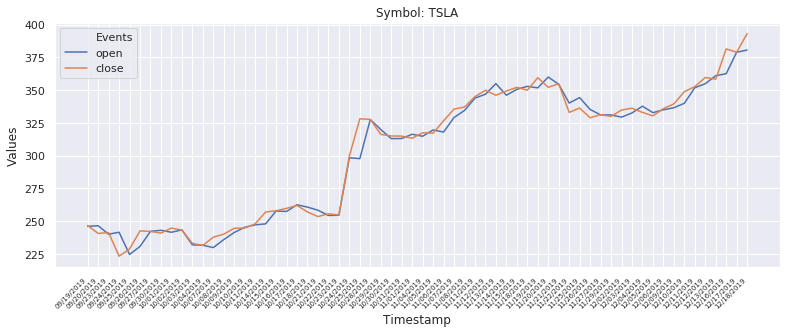

In [128]:
main()